# Hands-on Computational Physics
## Mini-Project #1: Solving Poisson's Equation Numerically using the Finite-Difference Method

Hi there! Welcome to your first mini-project of the Hands-on Computational Physics SoC!

In this mini-project, We will take a look at the Finite Difference Method, which is a numerical method that can be used to solve a wide variety of Ordinary and Partial Differential Equations. We will then apply this technique to solve Poisson's equation and thus get the electric potential at any point, given some charge distribution and boundary conditions.

### Using The Finite Difference Method to Solve Partial Differential Equations

The intuition behind the finite-difference method is the following:

Let's say you have some sort of linear differential equation involving a function and its derivatives. You know that you can make approximations of a derivative by considering the value of the function at a point and another point nearby.

When you write down the derivatives of $f(x)$ using the neighboring points such as $f(x + h), f(x - h)$, AND if the differential equation is linear, your differential equation reduces to the problem of solving a large set of linear equations, which have the variables $v_i = f(p_i = x + i*h), i \in \mathbb{Z}$ and $p_i$ within the boundary we are trying to solve the equation in.

In fact, at the boundary, there should be known values $f(p_{boundary})$, that are also part of the set of linear equations for points near the boundary.

After all of this, the set of linear equations we are left with should hopefully have a solution, which is an approximate solution to the original differential equation.


### Theory

Let's begin working with the Poisson's equation.


Poisson's equation (in 3 dimensions) is 
$$\nabla^2 U = -\rho$$
$$\implies \frac{\partial^2 U(x, y, z)}{\partial x^2} + \frac{\partial^2 U(x, y, z)}{\partial y^2} + \frac{\partial^2 U(x, y, z)}{\partial z^2} = -\rho(x,y,z)$$

Where $\rho$ is the charge density at a point, and $U$ is the electric potential at a point. Both are scalar functions.

Let's take Poisson's equation to be in 2 dimensions:

$$\frac{\partial^2 U(x, y, z)}{\partial x^2} + \frac{\partial^2 U(x, y, z)}{\partial y^2} = -\rho(x,y)$$

We know that the partial derivative w.r.t. a variable of a multivariate function (i.e. a function dependent on multiple variables) is simply the change in the function w.r.t. change in _only_ this variable.

We also know of the approximation to the derivative of a function in 1D (i.e. dependent on only one variable) is:

$$f'(x) = \frac{f(x + h/2) - f(x - h/2)}{h}$$

We can derive an approximation to the second derivative using the approximation for the first derivative:

$$f''(x) = \frac{f'(x + h/2) - f'(x - h/2)}{h}$$
$$= \frac{(\frac{f(x + h/2 + h/2) - f(x + h/2 - h/2)}{h}) - (\frac{f(x - h/2 + h/2) - f(x - h/2 - h/2)}{h})}{h}$$
$$=  \frac{f(x + h) - 2f(x) + f(x - h)}{h^2}$$



## Question 1:

>The above derivation for the approximation to the second derivative is quite hand-wavey, isn't it? Use the Taylor Series for $f(x - h), f(x), f(x + h)$ and construct an approximation to $f''(x)$ by removing higher order terms in the expansion and then solving for $f''(x)$. You should get the same approximation as above. You can write down your solution on paper and upload it on your progress doc, or you can use $\LaTeX$ to write your solution here. This question will help you in deriving the approximations for any order by yourself!

## Answer 1

Let's look at the Taylor series expansion of $f(x+h)$ and $f(x-h)$.

\begin{align*}
    f(x+h) = f(x) + hf'(x) + \frac{h^2}{2!}f''(x) + \frac{h^3}{3!}f'''(x) + \dots \\
    f(x-h) = f(x) - hf'(x) + \frac{h^2}{2!}f''(x) - \frac{h^3}{3!}f'''(x) + \dots
\end{align*}

Now if we add these two equations and ignore cubic and higher orders of $h$, we get,

\begin{align*}
    f(x+h) + f(x-h) = 2f(x) + h^2 f''(x) 
\end{align*}

Rearranging this, we get the approximate formula for $f''(x)$ i.e.
\begin{equation*}
    f''(x) = \frac{f(x+h) + f(x-h) - 2f(x)}{h^2}
\end{equation*}

Let us now do something called _discretization_.

Discretization is simply taking a continuous function, variable, anything, and making it into discrete values. We cannot numerically solve Poisson's Equation for each coordinate point. Instead, we will solve Poisson's equation for a discrete _grid_ of points; if we take a grid that is fine-grained enough (i.e. the value of $h$ is sufficiently small), then we can be confident that the numerical solutions are close to what would happen in a real experiment - given that Maxwell's Equations are correct. 

Let us assign the indices $(i, j)$ to the (discretized) coordinate $(x = i*h,y = j*h)$, where $i$ and $j$ are integers.

Thus we can also denote $U(x = i*h, y = j*h)$ as $U_{ij}$. 
Also denote $h$ as $\Delta i$.  
In fact, if the coordinate grid is not of the same scale in the two axes i.e. $(x, y) = (i*h,j*k)$, then we write $h, k = \Delta i, \Delta j$.  

For the charge distribution $\rho$, we can discretize it by finding the average charge within a grid cell and taking that to be the value of $\rho_{i,j}$.

Now, since the partial derivative of a function is essentially a 1D derivative over a particular variable, with all other variables appearing to be constant, we can write:

$$\frac{\partial^{2}U(x,y)}{\partial x^2} = \frac{U(x + h, y) - 2U(x, y) + U(x - h, y)}{h^2}$$
$$ = \frac{1}{\Delta i \Delta j}( U_{i + 1, j} - 2U_{i,j} + U_{i - 1, j})$$

Similarly,
$$\frac{\partial^{2}U(x,y)}{\partial y^2} = \frac{1}{\Delta i \Delta j}( U_{i, j + 1} - 2U_{i,j} + U_{i, j - 1})$$

Plugging these results into Poisson's equation gives us:

$$U_{i + 1, j} + U_{i, j + 1} + U_{i - 1, j} + U_{i, j - 1} - 4U_{i,j} =-( \Delta i \Delta j) \rho_{i,j}$$

Which, as you can see, is an equation for $U_{i,j}$ given in terms of its neighboring points.

Note, that all 'Solving' Poisson's equation means is to find the function $U$ in terms of the coordinates $x$ and $y$, where $U$ is subject to some charge distributions. In the discretized form, the boundary condition corresponds to known values of $U_{i', j'}$ where $i', j'$ correspond to coordinates that "lie on the boundary", and in our case these are taken to have zero potential at the boundary. Thus, the discretized form of Poisson's equation along with the boundary conditions forms a set of Linear equations with the variables $U_{i,j}$ for all possible values of $i$ and $j$. If we take our coordinate space to be a $10 \times 10$ coordinate grid, we will have i, j range from 0 to 9.

## Question 2:

>a) In the discretized equation for the Poisson equation, we have this $\Delta i \Delta j$ term. What value should we set it to and why? Does it affect our results?

>b) The best way to learn something is to apply it - so why not apply this technique of discretizing equations to another differential equation?


>The Time-Dependent Schrodinger Equation in one dimension can be written as:

>$$i \hbar \frac{\partial \Psi(x, t)}{\partial t} = -\frac{\hbar^2}{2m} \frac{\partial^2 \Psi(x, t)}{\partial x^2} + V(x, t)\Psi(x, t)$$

>Use the finite difference method to discretize this equation, just like we did for Poisson's equation. What kind of $\Delta i$ and $\Delta j$ terms do you get now?





## Answer 2:
 

a) Theoritically it should be set as low as possible as lowering it will increase the number of grids. This will increase the resolution of our solutions and we will get more accurate result.

b) For $x$ variable,$$\frac{\partial^{2}\Psi(x,y)}{\partial x^2} = \frac{1}{\Delta i \Delta j}( \Psi_{i + 1, j} - 2\Psi_{i,j} + \Psi_{i - 1, j})$$

For $t$ variable, $$\frac{\partial \Psi(x, t)}{\partial t} = \frac{1}{2\Delta j}(\Psi_{i, j + 1} - \Psi_{i, j - 1})$$

Thus the discretized equation becomes, $$ \frac{i\hbar}{2\Delta j}(\Psi_{i, j + 1} - \Psi_{i, j - 1}) = -\frac{\hbar^2}{2m\Delta i \Delta j} ( \Psi_{i + 1, j} - 2\Psi_{i,j} + \Psi_{i - 1, j}) + V_{i, j}\Psi_{i, j}$$

### Implementation

We write down the collection of all variables $U_{i,j}$ as a single vector by flattening the $U$ matrix into one dimension, and making the correct matrix elements to be 1 or -4 such that we get the same set of equations as in the discretized Poisson Equation.

Here's what flattening a $2 \times 2$ square matrix looks like:

$$\begin{bmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22}
\end{bmatrix} \quad \underrightarrow{\text{flatten}} \quad 
\begin{bmatrix}
a_{11}  \\
a_{12} \\
a_{21} \\
a_{22} \\
\end{bmatrix}
$$
Thus, we get the matrix equation
$$M U_{flat} = -\rho_{flat}$$
Where $M$ is the Matrix constructed for the Laplacian Operator $\nabla^2 = \frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2} + \frac{\partial^2}{\partial z^2}$, and $U_{flat}$, $\rho_{flat}$ are the flattened vectors of $U$, $\rho$

We get $U_{flat}$ by solving this system of linear equations, and finally, get $U$ by reshaping $U_{flat}$ back into a square grid.

## Question 3:

Before we jump to writing the code, let's make sure that we understand what we are doing, with the help of a very small case we can do by hand.

>Consider a 3x3 grid of points (so the flattened $U$ and $\rho$ vectors have 9 elements). Write the Poisson equation as a matrix equation, with $\rho = 1$ at the central point and 0 elsewhere.

$$ \frac{1}{-\Delta i \Delta j}
\begin{bmatrix}
-4 & 1 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
1 & -4 & 1 & 0 & 1 & 0 & 0 & 0 & 0\\
0 & 1 & -4 & 0 & 0 & 1 & 0 & 0 & 0\\
1 & 0 & 0 & -4 & 1 & 0 & 1 & 0 & 0\\
0 & 1 & 0 & 1 & -4 & 1 & 0 & 1 & 0\\
0 & 0 & 1 & 0 & 1 & -4 & 0 & 0 & 1\\
0 & 0 & 0 & 1 & 0 & 0 & -4 & 1 & 0\\
0 & 0 & 0 & 0 & 1 & 0 & 1 & -4 & 1\\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 1 & -4\\
\end{bmatrix}
\begin{bmatrix}
U_{11} \\ U_{12} \\ U_{13} \\
U_{21} \\ U_{22} \\ U_{23} \\
U_{31} \\ U_{32} \\ U_{33}
\end{bmatrix} = 
\begin{bmatrix}
\rho_{11} \\ \rho_{12} \\ \rho_{13} \\
\rho_{21} \\ \rho_{22} \\ \rho_{23} \\
\rho_{31} \\ \rho_{32} \\ \rho_{33}
\end{bmatrix} = 
\begin{bmatrix}
0 \\ 0 \\ 0 \\ 0 \\ 1 \\ 0 \\ 0 \\ 0 \\ 0
\end{bmatrix}$$

### Code

In [1]:
#import standard data science libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
N = 100
#define our N x N charge distribution grid
cd_grid = np.zeros(shape=(N,N))

#set boundary charge distribution; you can set it to anything you want
cd_grid[N//2 + 10,N//2] = 1
cd_grid[N//2 - 10,N//2] = -1

cd_grid[0,:] = 1
cd_grid[-1,:] = -1

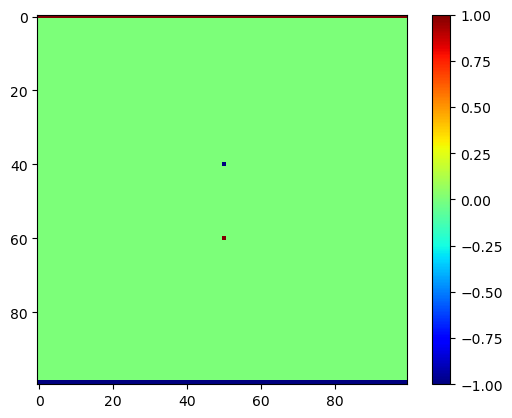

In [3]:
#show the charge distribution grid before we start
plt.imshow(cd_grid, cmap='jet', interpolation='nearest')
plt.colorbar()
plt.show()

## Question 4:

It's time to write some code!

>Carefully look the discretized equation we derived for Poisson's equation. The left side of the equation is simply the discretized version of the Laplacian operator $\nabla^2$. Below, we initialize the ```operator``` matrix with all zero elements. Complete the function ```make_laplacian_operator``` such that the matrix element ```operator[index1, index2]``` is either 0, 1, or -4, based on the discretized Poisson equation. 

In [4]:
#flatten the charge distribution grid into 1 dimension
cd_flat = cd_grid.flatten()

#now, we will define the operator matrix
operator = np.zeros((N**2,N**2))

#we will implement the Laplacian operator in matrix form
def make_laplacian_operator(myoperator):
  """ input: myoperator, a N**2 x N**2 matrix with all it's elements zero

      output: a N**2 x N**2 matrix with its element values such that
      the U_flat vector, when matrix multiplied by the operator,
      gives us the left hand sides of the set of equations
      (one for each value of i, j) in the discrete Poisson equation .
  """
  
  for i in range(0, N):
    for j in range(0, N):
        if i < N-1 : myoperator[N*i + j, N*i + j + N] = 1
        if j < N-1 : myoperator[N*i + j, N*i + j + 1] = 1
        if i > 0 : myoperator[N*i + j, N*i + j - N] = 1
        if j > 0 : myoperator[N*i + j, N*i + j - 1] = 1
        myoperator[N*i + j, N*i + j] = -4
    
  return myoperator

#apply this function
operator = make_laplacian_operator(operator)

## Question 5:

Now that we have converted our differential equation into a matrix equation, all that remains is to solve the matrix equation, which is 

$$M U_{flat} = -\rho_{flat}$$

where $M$ is your ```operator``` matrix, and $\rho_{flat}$ is just ```cd_flat```. You need to obtain $U_{flat}$ by solving this matrix equation, which is just a system of linear equations where the variables are the elements of $U_{flat}$.

>Implement the function ```solve_system_lineq``` using the either Gauss-Seidel, Jacobi, or any other method you know that can numerically solve a system of linear equations. You can go back and decrease the value of ```N``` if your implementation is taking too much time to run.



In [5]:
def solve_system_lineq(A, b):
  """inputs:
      operator, an N**2 x N**2 matrix
      cd_flat, a vector of length N**2

     output:
      U_flat, a vector of length N**2 which is the solution to the linear system of equations -
      operator @ U_flat = cd_flat, where @ denotes matrix multiplication
  """
  #write your code here
  x = np.zeros((N**2))

  max_iterations = 1000
  epsilon = 1e-7

  for i in range(max_iterations):
        x_new = np.zeros(N**2)
        for j in range(N**2):
            s1 = np.dot(A[j, :j], x_new[:j])
            s2 = np.dot(A[j, j + 1:], x[j + 1:])
            x_new[j] = (b[j] - s1 - s2) / A[j, j]
        if np.allclose(x, x_new, rtol=epsilon):
            return x_new
        x = x_new
  return x

#I used my gauss seidel algorithm but it is taking an awful amount of time. 
#This other code for gauss seidel takes less time so I have used this.


# def Gauss_Seidel(A, b, x_i):
#     max_iterations = 100
#     for k in range(0, max_iterations):
#         d = x_i.copy()
#         for i in range(0, len(b)):
#             s = 0
#             for j in range(0, len(b)):
#                 if i != j: 
#                     s = s + A[i, j] * x_i[j]
#             x_i[i] = (b[i] - s) / A[i, i]
            
#         xd = np.linalg.norm(d)
#         xi = np.linalg.norm(x_i)
        
#         if abs(xi - xd) < 1e-5: 
#             break
            
#     return x_i

# x0 = np.zeros((N**2))

#apply this function
solution = solve_system_lineq(operator, cd_flat)

In [6]:
#reshape U_flat into U
U = solution.reshape((N,N))

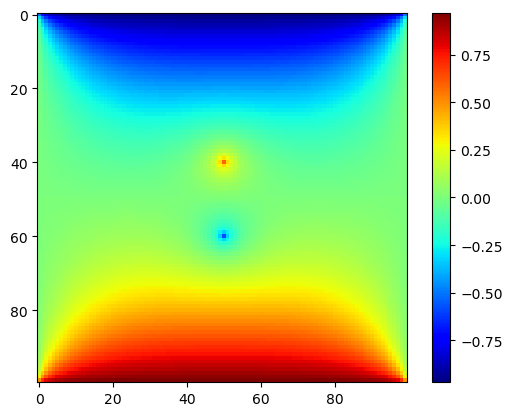

In [7]:
#display the solution U
plt.imshow(U, cmap='jet', interpolation='nearest')
plt.colorbar()
plt.show()

If you implemented everything correctly, you should see an interesting charge distribution that matches with the plot on the first slide of the week1-2 slides. Congratulations! You have completed the mini-project. Feel free to experiment with different charge distributions. Can you come up with even more interesting plots?

The remaining part of this notebook does not contain further questions, but it should be instructive to you, because the implementation is done in a similar way to how one would implement it in an actual project where space optimization, time optimization, and also the clarity and shortness of the code is important.

In particular, a serious problem with the implementation above is that it wastes a LOT of memory; for N = 100, your operator matrix is of the size 10^4 x 10^4 i.e 10^8 elements, most of which are zero.

The implementation below avoid this wasted space by using sparse matrices instead of "normal" matrices. Sparse matrices cleverly store only the nonzero matrix elements to save space. Also, we are solving the system of linear equations using the function scipy.spsolve (the equivalent for 'normal' matrices is np.linalg.solve). These optimizations enable you to use N = 1000 or beyond, which would require a ridiculous amount of time and memory in your previous implementation!

### Optimization

In [8]:
#we can significantly free up memory and speed up by using a sparse matrix, which is space efficient for matrices with a large number of zero elements
from scipy.sparse import lil_matrix, csr_matrix #lil_matrix is a sparse matrix format that allows for efficient matrix modifications
from scipy.sparse.linalg import spsolve


N = 1000
#define our N x N condition grid
cd_grid = np.zeros(shape=(N,N))

#set charge distribution
cd_grid[0,:] = 1
cd_grid[-1,:] = -1
cd_grid[:,0] = 1
cd_grid[:,-1] = -1

cd_flat = cd_grid.flatten()


operator_sparse = lil_matrix((N**2,N**2))
operator_sparse = make_laplacian_operator(operator_sparse)

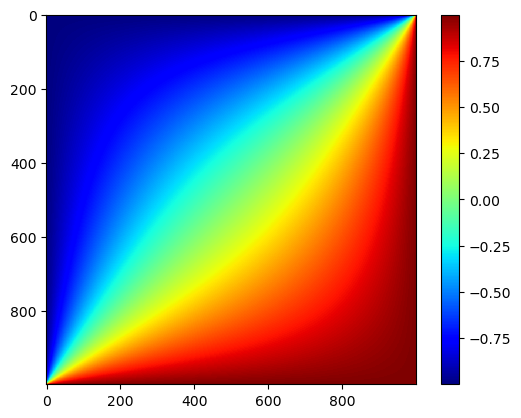

In [9]:
#we obtain the solution by inverting the operator matrix
solution_sparse = spsolve(operator_sparse.tocsr(), cd_flat) # spsolve works with csr_matrix and not lil_matrix

#we reshape the solution
U_sparse = solution_sparse.reshape((N,N))

#display the solution U
plt.imshow(U_sparse, cmap='jet', interpolation='nearest')
plt.colorbar()
plt.show()


In [10]:
# let us wrap everything neatly into a function that takes in the Charge Distribution and returns the solution
# let's also make it so that we can choose between the sparse and non-sparse solution

def Poisson_solver_nosparse(cd_grid):
    N = cd_grid.shape[0]
    cd_flat = cd_grid.flatten()
    operator = make_laplacian_operator(np.zeros((N**2,N**2)))
    solution = solve_system_lineq(operator, cd_flat)
    U = solution.reshape((N,N))
    return U

def Poisson_solver_sparse(cd_grid):
    N = cd_grid.shape[0]
    cd_flat = cd_grid.flatten()
    operator_sparse = make_laplacian_operator(lil_matrix((N**2,N**2)))
    solution_sparse = spsolve(operator_sparse.tocsr(), -cd_flat) #you can look up scipy.sparse.linalg.spsolve for more details
    U_sparse = solution_sparse.reshape((N,N))
    return U_sparse

def Poisson_solver(cd_grid, sparse=True):
    if sparse:
        return Poisson_solver_sparse(cd_grid)
    else:
        return Poisson_solver_nosparse(cd_grid)

#also let us wrap the plotting into a functionfunction
def plot_solution(U, cmap='jet'):
    plt.imshow(U, cmap=cmap, interpolation='nearest')
    plt.colorbar()
    plt.show()

In [11]:
#let's try out implementation on a bunch of interesting charge distributions
N = 100
#simulating two point charges
cd_grid = np.zeros(shape=(N,N))
cd_grid[N//2,N//2 - 10] = 1
cd_grid[N//2,N//2 + 10] = 1
U = Poisson_solver(cd_grid)

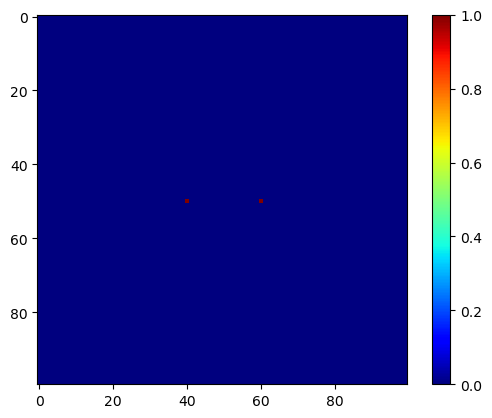

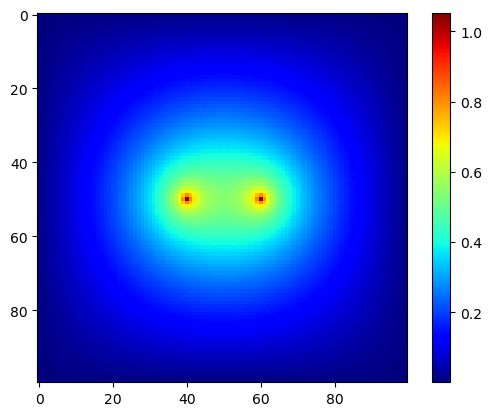

In [12]:
#here's the charge distribution plot
plot_solution(cd_grid)
#here's the solution plot
plot_solution(U)

In [13]:
#charge distribution simulating a dipole
cd_grid = np.zeros(shape=(N,N))
cd_grid[N//2,N//2 - 5] = 10000
cd_grid[N//2,N//2 + 5] = -10000
U = Poisson_solver(cd_grid)


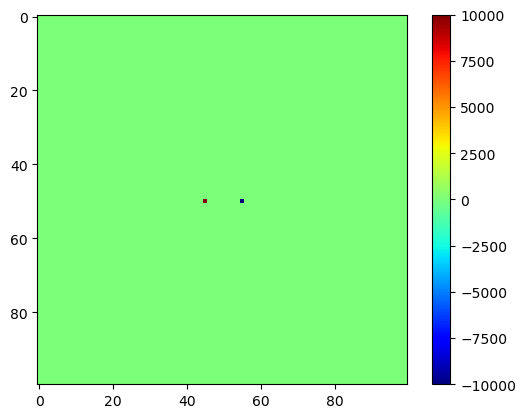

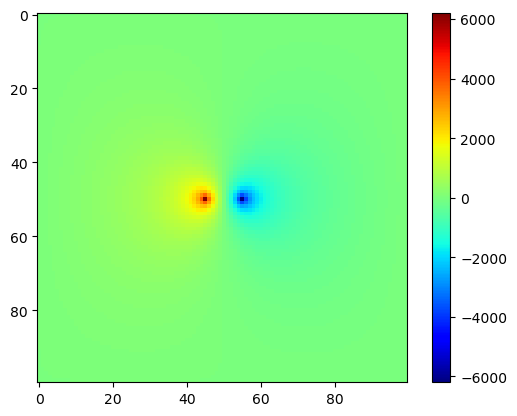

In [14]:
#here's the charge distribution plot
plot_solution(cd_grid)

#here's the solution plot
plot_solution(U)

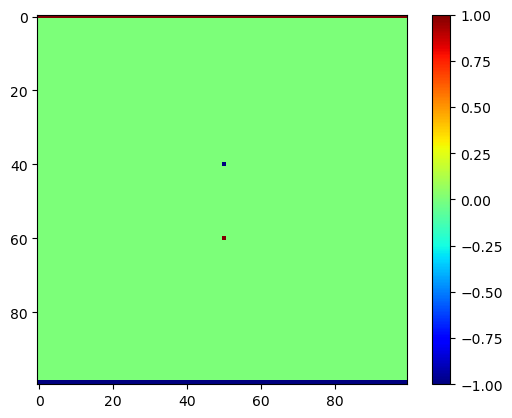

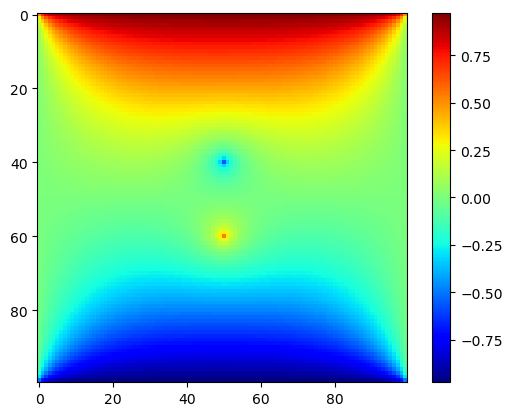

In [15]:
#simulating a 2 point charges and a two charged plates
N = 100

cd_grid = np.zeros(shape=(N,N))
cd_grid[N//2 + 10,N//2] = 1
cd_grid[N//2 - 10,N//2] = -1

cd_grid[0,:] = 1
cd_grid[-1,:] = -1

U = Poisson_solver(cd_grid)
plot_solution(cd_grid)
plot_solution(U)

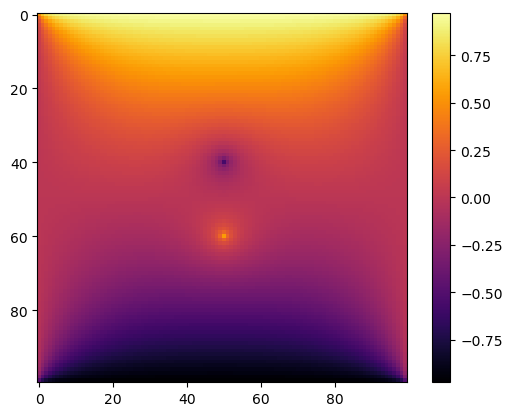

In [16]:
plot_solution(U, 'inferno') #looks epic!

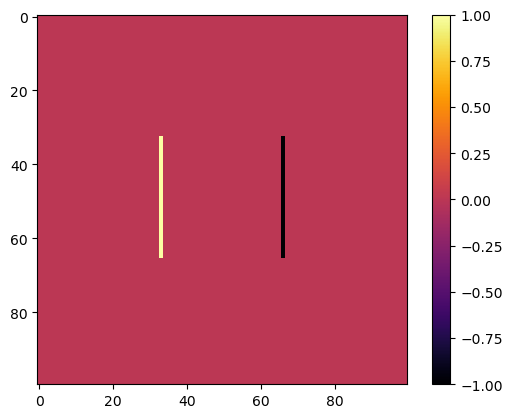

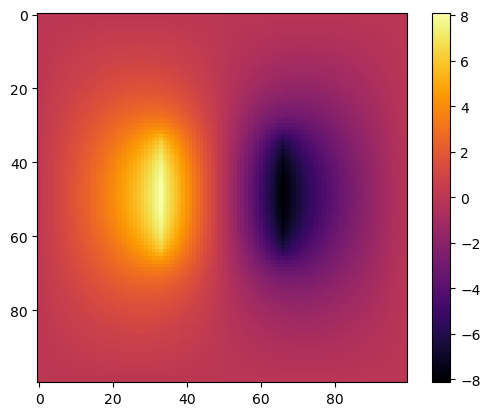

In [17]:
cd_grid = np.zeros(shape=(N,N))
cd_grid[N//3:2*N//3,N//3] = 1
cd_grid[N//3:2*N//3,2*N//3] = -1

U = Poisson_solver(cd_grid)

plot_solution(cd_grid, 'inferno')
plot_solution(U, 'inferno')